In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import random
from tqdm import tqdm
import json

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.ticker import FormatStrFormatter

## TESTS:
***

In [57]:
#Load the data and generate the graph

fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)
df = df[(df['cmdCode'] == 1) & (df['yr'] == 2015)]

G = nx.from_pandas_edgelist(df,
                             source       = 'rt3ISO',
                             target       = 'pt3ISO',
                             edge_attr    =  'TradeValue',
                             create_using = nx.DiGraph())

In [4]:
countries_rt = df['rt3ISO'].unique()
countries_rt.sort() # if some element is nan sort fails!
countries_pt = df['pt3ISO'].unique()
countries_pt.sort()
commodities = df['cmdCode'].unique()
periods = df['yr'].unique()
print('Periods -> ', len(periods))
print('# of reporter countries -> ', len(countries_rt))
print('# of partner countries -> ', len(countries_pt))
print('# of commodities -> ',  len(commodities))

Periods ->  1
# of reporter countries ->  169
# of partner countries ->  233
# of commodities ->  23


In [5]:
commodities

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [46]:
k_in  = np.array(list(dict(G.in_degree()).values()))
k_out = np.array(list(dict(G.out_degree()).values()))
k     = np.array(list(dict(G.degree()).values()))
k_in.sum()/len(k_in)

20.216494845360824

In [50]:
(k**2).sum()/len(k) - 2* k.sum()/len(k)

3415.0

In [61]:
len(max(nx.weakly_connected_components(G), key=len))

194

In [79]:
to_remove = random.sample(G.edges(), 1000)

In [80]:
G_TEST = G.copy()
G_TEST.remove_edges_from(to_remove)

In [82]:
k_in  = np.array(list(dict(G.in_degree()).values()))
k_out = np.array(list(dict(G.out_degree()).values()))
k     = np.array(list(dict(G.degree()).values()))
k_in.sum()/len(k_in)

15.061855670103093

In [77]:
sorted(nx.weakly_connected_components(G), key=len, reverse=True)[1]

{'NIU'}

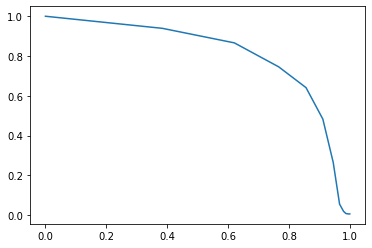

In [9]:
steps = 20
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
#frac_to_drop = np.linspace(0.001,0.999,steps)
frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    pf = 0
    for i in range(20):
        G_reduced = G.copy()
        to_remove = random.sample(G.edges(), int(f*n_edges))
        G_reduced.remove_edges_from(to_remove)
        #k = np.array(list(dict(G_reduced.degree()).values()))
        pf += len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append((pf/20) / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

In [61]:
unsorted_EBC = nx.edge_betweenness_centrality(G)#, weight='TradeValue')
sorted_EBC   = dict(sorted(unsorted_EBC.items(), key=lambda item: item[1], reverse=True))  
#unsorted_EBC

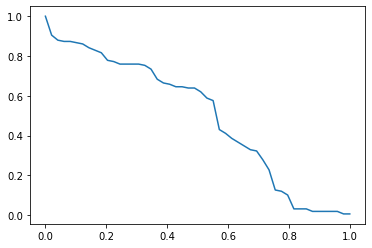

In [62]:
steps = 50
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
frac_to_drop = np.linspace(0.001,0.999,steps)
#frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    G_reduced = G.copy()
    to_remove = list(sorted_EBC.keys())[:int(f*n_edges)]
    G_reduced.remove_edges_from(to_remove)
    #k = np.array(list(dict(G_reduced.degree()).values()))
    pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append(pf / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

In [39]:
unsorted_strong = {(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
sorted_strong   = dict(sorted(unsorted_strong.items(), key=lambda item: item[1], reverse=True))  
#{(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
#sorted_strong

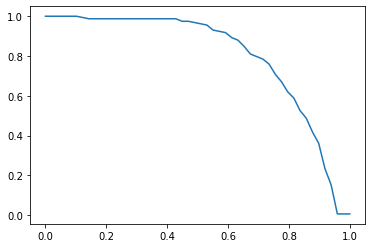

In [40]:
unsorted_strong = {(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
sorted_strong   = dict(sorted(unsorted_strong.items(), key=lambda item: item[1], reverse=True))  
steps = 50
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
frac_to_drop = np.linspace(0.001,0.999,steps)
#frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    G_reduced = G.copy()
    to_remove = list(sorted_strong.keys())[:int(f*n_edges)]
    G_reduced.remove_edges_from(to_remove)
    #k = np.array(list(dict(G_reduced.degree()).values()))
    pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append(pf / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

In [50]:
unsorted_DP = {(edge[0], edge[1]) : G.degree()[edge[0]]*G.degree()[edge[1]] for edge in G.edges()}
sorted_DP   = dict(sorted(unsorted_DP.items(), key=lambda item: item[1], reverse=True))  
#sorted_DP

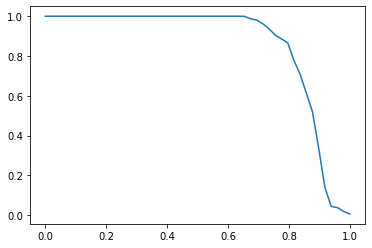

In [51]:
unsorted_DP = {(edge[0], edge[1]) : G.degree()[edge[0]]*G.degree()[edge[1]] for edge in G.edges()}
sorted_DP   = dict(sorted(unsorted_DP.items(), key=lambda item: item[1], reverse=True))  
steps = 50
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
frac_to_drop = np.linspace(0.001,0.999,steps)
#frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    G_reduced = G.copy()
    to_remove = list(sorted_DP.keys())[:int(f*n_edges)]
    G_reduced.remove_edges_from(to_remove)
    #k = np.array(list(dict(G_reduced.degree()).values()))
    pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append(pf / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

## Robustness:
***

To represent the robustness of the Network we are going to consider the probability of a node to belong to the Largest strongly(weakly) Connected Component, LCC w.r.t. the fraction f of removed links.

The probability is normalized w.r.t. the probability of belonging to LCC when no links are removed.

The robustness is tested for:
* Random attack: the links to be removed are chosen at random.
* BC attack: links are removed according to their betweenness centrality (BC), i.e. links with higher betweenness centrality are deleted first.
* BCw attack: links are removed according to their weighted betwennes centrality.
* Strong attack: links are removed in decreasing order of weight, i.e. links with higher weight are removed first and it represents an attack directed to strong links.

In [9]:
def test_robustness(G, strongly=True, plot=False, cmdLabel=1):
    steps      = 30
    rand_steps = 20
    n_nodes = len(G.nodes())
    n_edges = len(G.edges())
    
    unsorted_strong = {(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
    sorted_strong   = dict(sorted(unsorted_strong.items(), key=lambda item: item[1], reverse=True))  
    #unsorted_DP = {(edge[0], edge[1]) : G.degree()[edge[0]]*G.degree()[edge[1]] for edge in G.edges()}
    #sorted_DP   = dict(sorted(unsorted_DP.items(), key=lambda item: item[1], reverse=True))  


    if (strongly):
        P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
    else:
        P_0 = len(max(nx.weakly_connected_components(G), key=len)) #/ n_nodes
    
    out = dict()
    P_f = [[],[],[]]
    P_f_rand = []
    frac_to_drop = np.linspace(0.001,0.999,steps)
    frac_to_drop_BC = np.linspace(0.001,0.999,2*steps)
    frac_to_drop_BCw = np.linspace(0.001,0.999,2*steps)
    frac_to_drop_rand = 1 - np.logspace(0,-4,rand_steps)
    # BC attack
    G_reduced = G.copy()
    last_f = 0
    for f in tqdm(frac_to_drop_BC, desc='cmd='+str(cmdLabel)+' BC_atk', leave=False):
        
        unsorted_EBC = nx.edge_betweenness_centrality(G_reduced)
        sorted_EBC   = dict(sorted(unsorted_EBC.items(), key=lambda item: item[1], reverse=True))
        to_remove = list(sorted_EBC.keys())[:int((f-last_f)*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f[0].append(pf / P_0)
        #in_deg  = np.array([val for (node, val) in G_reduced.degree()])
        #out_deg = np.array([val for (node, val) in G_reduced.out_degree()])
        #print(1-1/in_deg.mean())
        last_f = f
    # BCw attack
    G_reduced = G.copy()
    last_f = 0
    for f in tqdm(frac_to_drop_BCw, desc='cmd='+str(cmdLabel)+' BCw_atk', leave=False):
        unsorted_EBCw = nx.edge_betweenness_centrality(G_reduced, weight='TradeValue')
        sorted_EBCw   = dict(sorted(unsorted_EBCw.items(), key=lambda item: item[1], reverse=True))
        to_remove = list(sorted_EBCw.keys())[:int((f-last_f)*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f[1].append(pf / P_0)
        last_f = f
    # Strong attack
    for f in tqdm(frac_to_drop, desc='cmd='+str(cmdLabel)+' Str_atk', leave=False):
        G_reduced = G.copy()
        to_remove = list(sorted_strong.keys())[:int(f*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f[2].append(pf / P_0)
    # Random atack
    for f in tqdm(frac_to_drop_rand, desc='cmd='+str(cmdLabel)+' Rand_atk', leave=False):
        pf = 0
        for i in range(20):
            G_reduced = G.copy()
            to_remove = random.sample(G.edges(), int(f*n_edges))
            G_reduced.remove_edges_from(to_remove)
            if (strongly):
                pf += len(max(nx.strongly_connected_components(G_reduced), key=len))
            else:
                pf += len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f_rand.append((pf/20) / P_0)

    out['Random attack'] = [frac_to_drop_rand, P_f_rand]
    out['BC attack'] = [frac_to_drop_BC, P_f[0]]
    out['BCw attack'] = [frac_to_drop_BCw, P_f[1]]
    out['Strong attack'] = [frac_to_drop, P_f[2]]
    
    # Set equal range for frac_to_drop but w/ different # of steps
    # -> check something like eps = 0.05
    if (plot):
        plt.figure(figsize=[8,8])
        for key in out.keys():
            plt.plot(out[key][0], out[key][1], '-o', label=key, markersize=4)
        plt.ylabel('LSCC')
        plt.xlabel('f')
        plt.legend()
        plt.show()
    
    return out

In [3]:
commodities_labels = pd.read_csv("current_data/commodities.csv", skipinitialspace = True)

In [2]:
fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)
df_mono = df.loc[(df.cmdCode == 1) & (df.yr == 2001)].reset_index()

G = nx.from_pandas_edgelist(df_mono,
                             source       = 'rt3ISO',
                             target       = 'pt3ISO',
                             edge_attr    =  'TradeValue',
                             create_using = nx.DiGraph())

In [185]:
LSCC_mono = test_robustness(G, strongly=True, plot=False)

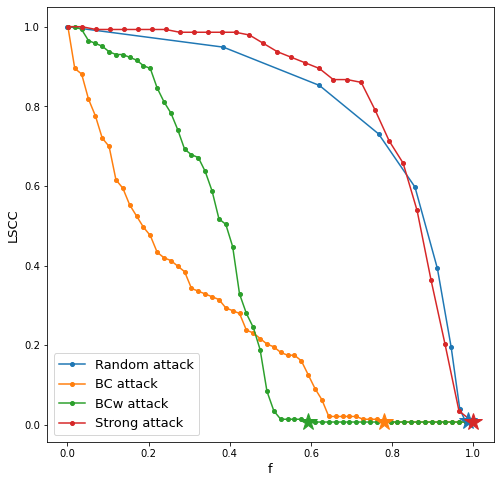

In [186]:
plt.figure(figsize=[8,8])
my_col = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'] 
for kk,key in enumerate(LSCC_mono.keys()):
    ix = list(np.array(LSCC_mono[key][1]) < 0.01).index(True)
    plt.plot(LSCC_mono[key][0], LSCC_mono[key][1], '-o', label=key, markersize=4, color=my_col[kk])
    plt.plot(LSCC_mono[key][0][ix], LSCC_mono[key][1][ix], '*', markersize=18, color=my_col[kk], zorder=5+kk)
plt.ylabel('LSCC', fontsize=13)
plt.xlabel('f', fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [27]:
commodities_2015_LSCC = dict()
for comm in range(1,24):

    G = nx.from_pandas_edgelist(df[(df['cmdCode'] == comm) & (df['yr'] == 2015)],
                                source       = 'rt3ISO',
                                target       = 'pt3ISO',
                                edge_attr    =  'TradeValue',
                                create_using = nx.DiGraph())
    commodities_2015_LSCC[commodities_labels.iloc[comm-1, 2]] = test_robustness(G, plot=False, cmdLabel=comm)


In [28]:
np.save('results/robustness_LSCC_2015.npy', commodities_2015_LSCC)

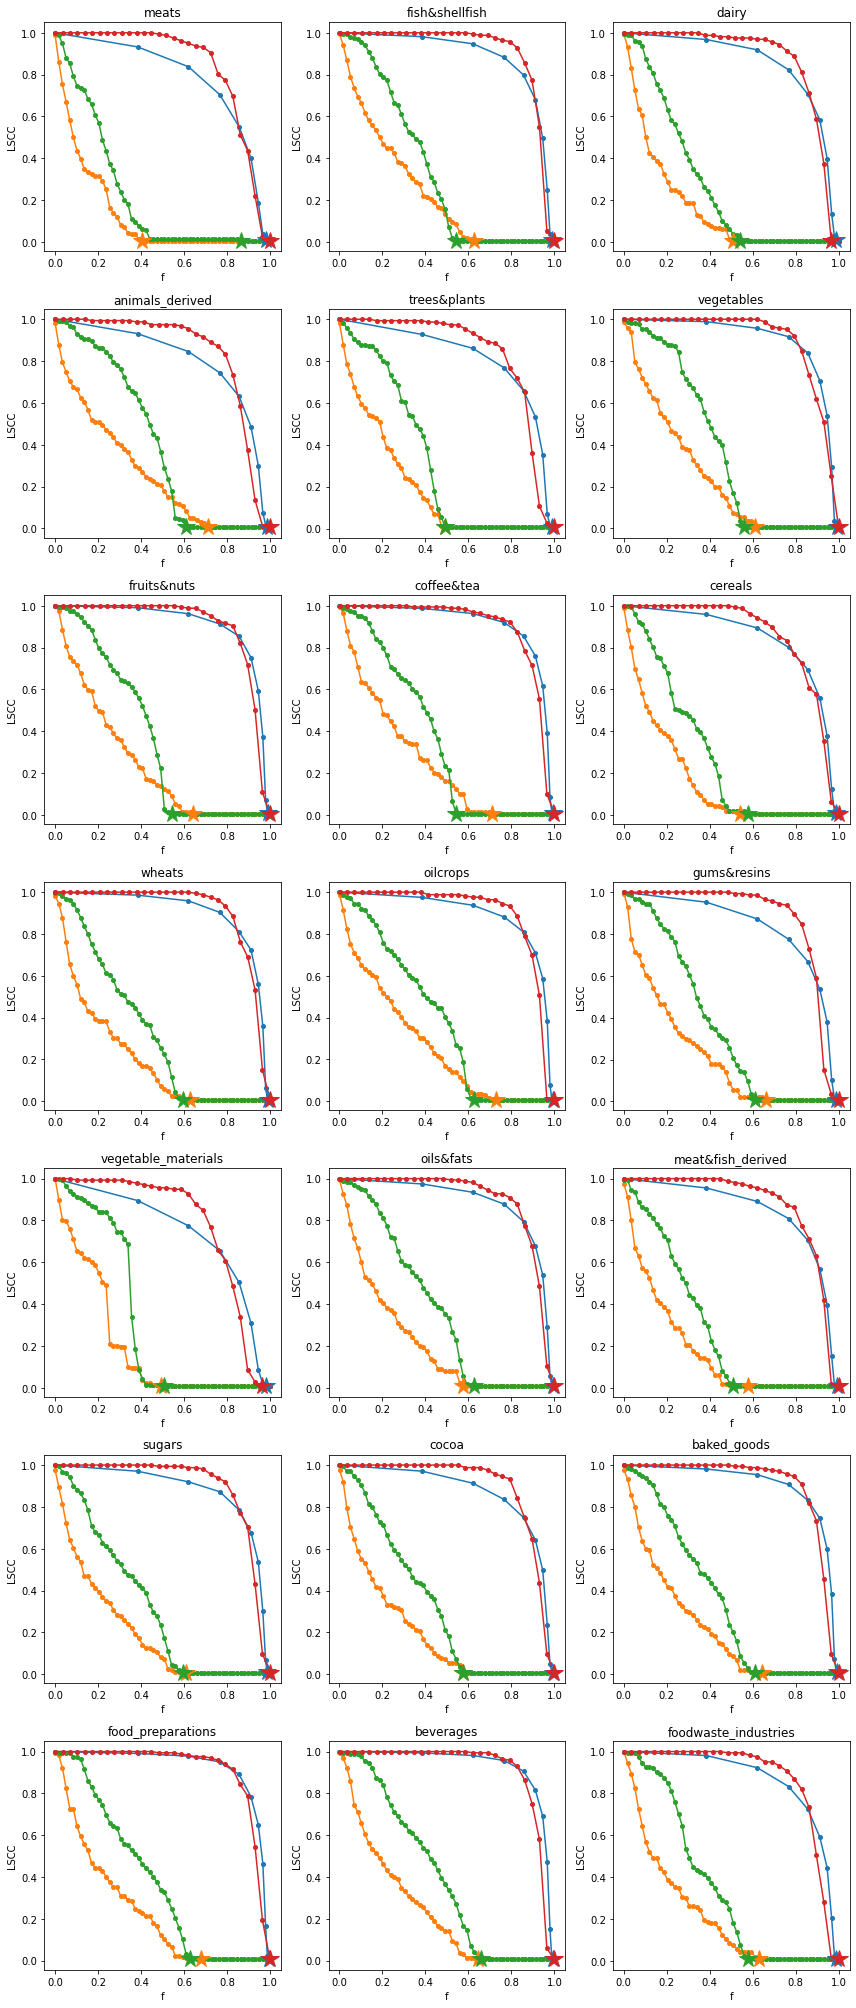

In [47]:
ccc = 3
fig, ax = plt.subplots(7,ccc, figsize=[12,28])
for ii, key in enumerate(commodities_2015_LSCC):
    for kk, attack in enumerate(commodities_2015_LSCC[key].keys()):
        ix = list(np.array(commodities_2015_LSCC[key][attack][1]) < 0.01).index(True)
        ax[ii//ccc, ii%ccc].plot(commodities_2015_LSCC[key][attack][0], commodities_2015_LSCC[key][attack][1], '-o', label=key, markersize=4)
        ax[ii//ccc, ii%ccc].plot(commodities_2015_LSCC[key][attack][0][ix], commodities_2015_LSCC[key][attack][1][ix], '*', markersize=18, color=my_col[kk], zorder=5+kk)
    ax[ii//ccc, ii%ccc].set_xlabel('f')
    ax[ii//ccc, ii%ccc].set_ylabel('LSCC')
    ax[ii//ccc, ii%ccc].set_title(key)
    #ax[ii//ccc, ii%ccc].legend()
plt.tight_layout()
plt.show()

In [140]:
np.array(G.out_degree())[:,1].astype(float).sum()

3068.0

In [29]:
def test_robustness2(df, plot=False, cmdLabel=1):
    df['norm_tv'] = df.TradeValue / df.groupby('rt3ISO')['TradeValue'].transform('sum')
    n_rt = len(np.unique(df.rt3ISO))
    n_edges = len(df)
    ix = list(df.index)
    ix.sort(key=list(df.norm_tv).__getitem__, reverse=True)
    steps = 50
    steps_rand = 20
    frac_to_drop_rand = np.linspace(0.001,0.999,steps_rand)
    #frac_to_drop = np.logspace(-4,0,steps)
    frac_to_drop = np.linspace(0.001,0.999,steps)
    out = {'Random attack' : [frac_to_drop_rand,[]],
           'BC attack'     : [frac_to_drop,[]],
           'BCw attack'    : [frac_to_drop,[]],
           'Strong attack' : [frac_to_drop,[]]}
    
    G = nx.from_pandas_edgelist(df,
                             source       = 'rt3ISO',
                             target       = 'pt3ISO',
                             edge_attr    =  'norm_tv',
                             create_using = nx.DiGraph())
    norm = np.array(G.out_degree())[:,1].astype(float).sum()
       
    # Random Attack
    for f in tqdm(frac_to_drop_rand, desc='cmd='+str(cmdLabel)+' Rand_atk', leave=False):
        mid = 0
        for ii in range(25):
            tmp = df.copy().reset_index()
            ix_rand = ix.copy()
            random.shuffle(ix_rand)
            tmp.loc[ix_rand[:int(f*n_edges)], 'norm_tv'] = 0
            mid += tmp.groupby('rt3ISO')['norm_tv'].sum().values.sum()
        
        out['Random attack'][1].append((mid/25)/n_rt)

    # Strong Attack
    for f in tqdm(frac_to_drop, desc='cmd='+str(cmdLabel)+' Str_atk', leave=False):
        tmp = df.copy().reset_index()
        tmp.loc[ix[:int(f*n_edges)], 'norm_tv'] = 0
        out['Strong attack'][1].append(tmp.groupby('rt3ISO')['norm_tv'].sum().values.sum()/n_rt)
    
    #######################
    strongly=True
    G_reduced = G.copy()
    last_f = 0
    for f in tqdm(frac_to_drop, desc='cmd='+str(cmdLabel)+' BC_atk', leave=False):
        
        unsorted_EBC = nx.edge_betweenness_centrality(G_reduced)
        sorted_EBC   = dict(sorted(unsorted_EBC.items(), key=lambda item: item[1], reverse=True))
        to_remove = list(sorted_EBC.keys())[:int((f-last_f)*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        out['BC attack'][1].append(np.array(G_reduced.out_degree())[:,1].astype(float).sum()/norm)
        last_f = f
    # BCw attack
    G_reduced = G.copy()
    last_f = 0
    for f in tqdm(frac_to_drop, desc='cmd='+str(cmdLabel)+' BCw_atk', leave=False):
        unsorted_EBCw = nx.edge_betweenness_centrality(G_reduced, weight='norm_tv')
        sorted_EBCw   = dict(sorted(unsorted_EBCw.items(), key=lambda item: item[1], reverse=True))
        to_remove = list(sorted_EBCw.keys())[:int((f-last_f)*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        out['BCw attack'][1].append(np.array(G_reduced.out_degree())[:,1].astype(float).sum()/norm)
        last_f = f

    #######################
    
    if (plot):
        plt.figure(figsize=[8,8])
        for key in out.keys():
            plt.plot(out[key][0], out[key][1], '-o', label=key, markersize=4)
        plt.xlabel('f')
        plt.ylabel('Avg % Imports')
        plt.legend()
        plt.show()
    
    return out

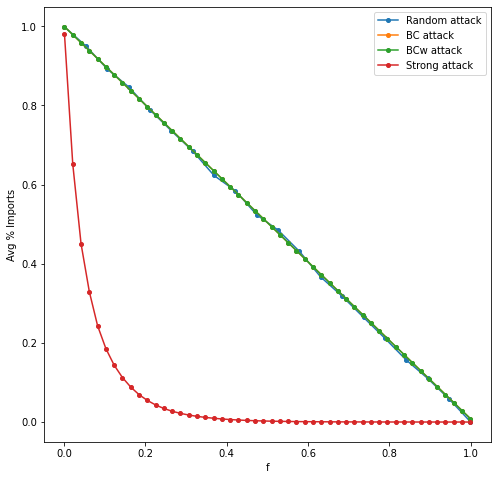

In [6]:
IMP_mono = test_robustness2(df_mono, plot=True)

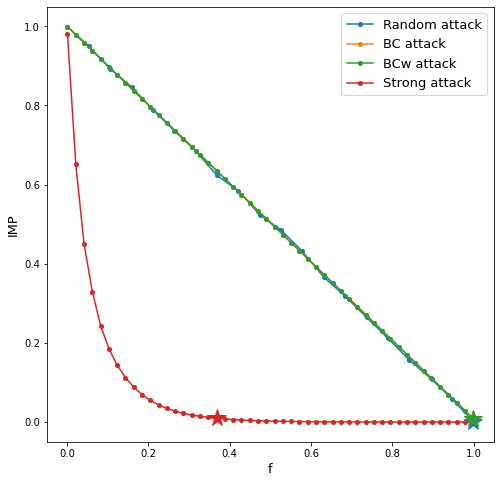

In [7]:
plt.figure(figsize=[8,8])
my_col = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for kk,key in enumerate(IMP_mono.keys()):
    ix = list(np.array(IMP_mono[key][1]) < 0.01).index(True)
    plt.plot(IMP_mono[key][0], IMP_mono[key][1], '-o', label=key, markersize=4, color=my_col[kk])
    plt.plot(IMP_mono[key][0][ix], IMP_mono[key][1][ix], '*', markersize=18, color=my_col[kk], zorder=5+kk)
plt.ylabel('IMP', fontsize=13)
plt.xlabel('f', fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [30]:
commodities_2015_IMP = dict() 
for comm in range(1,24):
    
    comm_df = df.loc[(df.cmdCode == comm) & (df.yr == 2015)].reset_index()
    commodities_2015_IMP[commodities_labels.iloc[comm-1, 2]]  = test_robustness2(comm_df, plot=False, cmdLabel=comm)

In [31]:
np.save('results/robustness_IMP_2015.npy', commodities_2015_IMP)

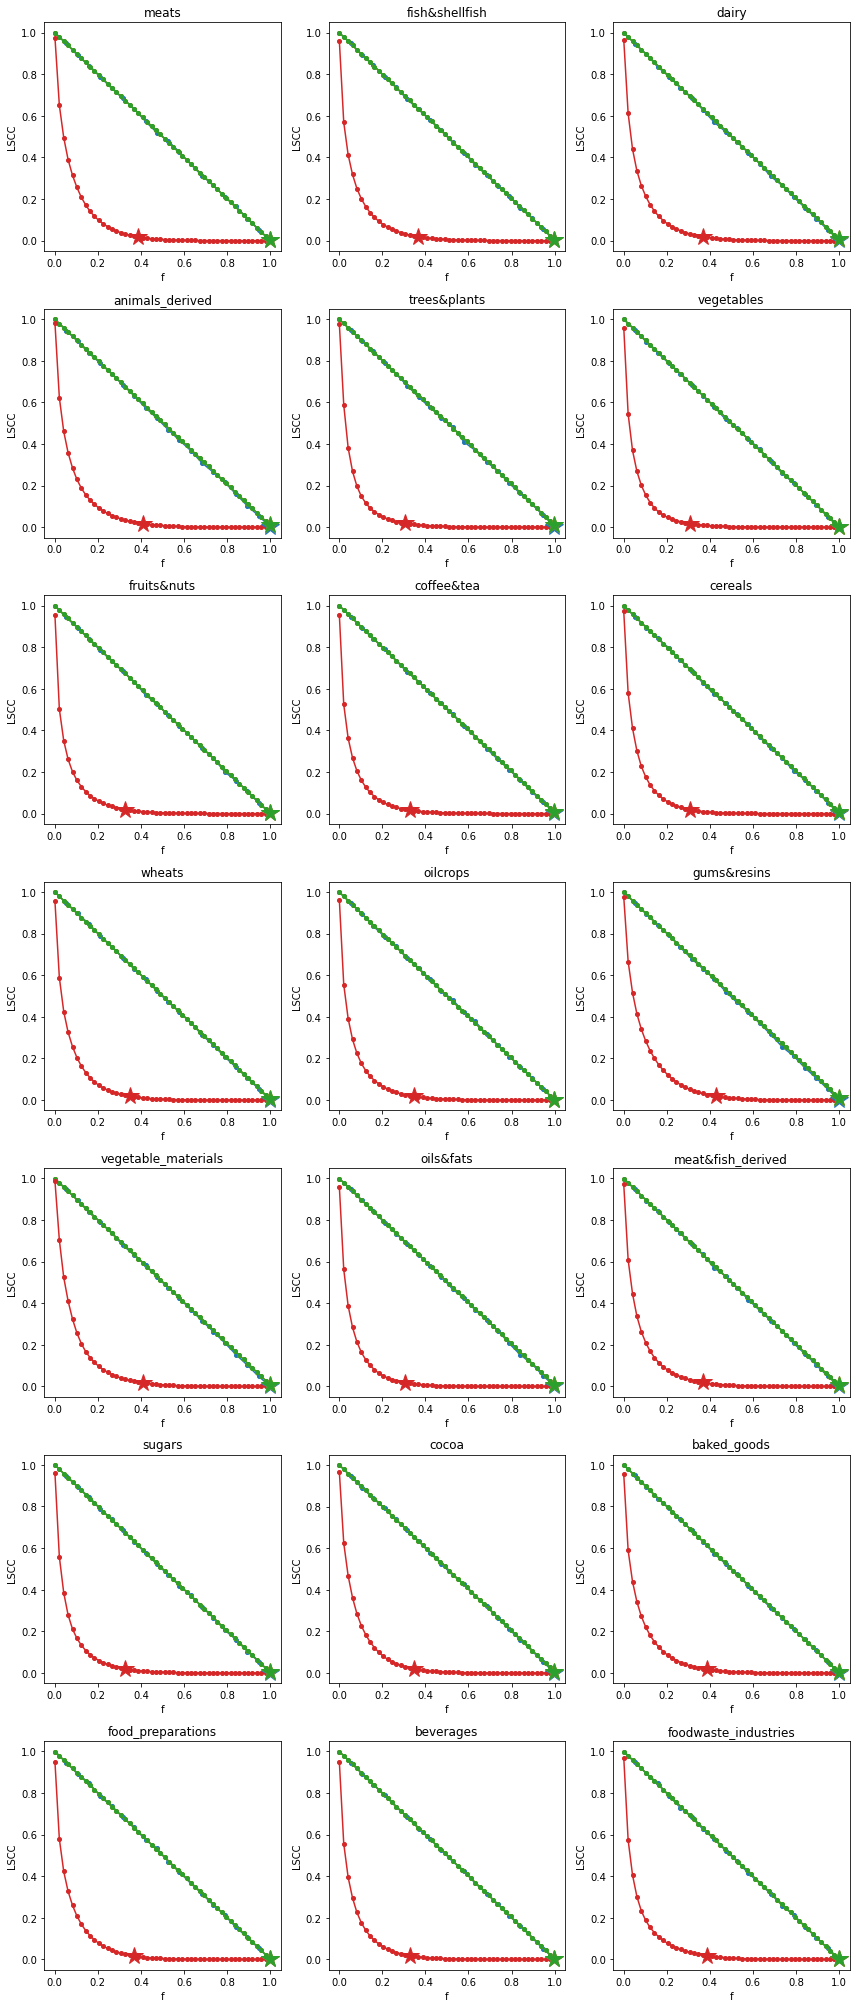

In [50]:
ccc = 3
fig, ax = plt.subplots(7,ccc, figsize=[12,28])
for ii, key in enumerate(commodities_2015_IMP):
    for kk, attack in enumerate(commodities_2015_IMP[key].keys()):
        ix = list(np.array(commodities_2015_IMP[key][attack][1]) < 0.01).index(True)
        ax[ii//ccc, ii%ccc].plot(commodities_2015_IMP[key][attack][0], commodities_2015_IMP[key][attack][1], '-o', label=key, markersize=4)
        ax[ii//ccc, ii%ccc].plot(commodities_2015_IMP[key][attack][0][ix], commodities_2015_IMP[key][attack][1][ix], '*', markersize=18, color=my_col[kk], zorder=5+kk)
    ax[ii//ccc, ii%ccc].set_xlabel('f')
    ax[ii//ccc, ii%ccc].set_ylabel('LSCC')
    ax[ii//ccc, ii%ccc].set_title(key)
    #ax[ii//ccc, ii%ccc].legend()
plt.tight_layout()
plt.show()

## Fast Functions
***

In [5]:
def fast_robustness(G, eps=0.5, strongly=True, label=''):
    '''
    It performs the BC attack and return the fraction for which the P drop below eps
    '''
    steps = 80
    n_nodes = len(G.nodes())
    n_edges = len(G.edges())
    if (strongly):
        P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
    else:
        P_0 = len(max(nx.weakly_connected_components(G), key=len)) #/ n_nodes
    P_f = []
    frac_to_drop = np.linspace(0.001,0.799,steps)
    
    G_reduced = G.copy()
    last_f = 0
    for f in tqdm(frac_to_drop, desc=str(label), leave=False):
        unsorted_EBC = nx.edge_betweenness_centrality(G_reduced)
        sorted_EBC   = dict(sorted(unsorted_EBC.items(), key=lambda item: item[1], reverse=True))
        to_remove = list(sorted_EBC.keys())[:int((f-last_f)*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f.append(pf / P_0)
        last_f = f
    ix = list(np.array(P_f) < eps).index(True)
    return frac_to_drop[ix]

def fast_robustness2(df, eps=0.5, label=''):
    '''
    It performs the Strong attack and return the fraction for which the P drop below eps
    '''
    df['norm_tv'] = df.TradeValue / df.groupby('rt3ISO')['TradeValue'].transform('sum')
    n_rt = len(np.unique(df.rt3ISO))
    n_edges = len(df)
    ix = list(df.index)
    ix.sort(key=list(df.norm_tv).__getitem__, reverse=True)
    steps = 200
    P_f = []
    frac_to_drop = np.logspace(-4,0,steps)
    for f in tqdm(frac_to_drop, desc=str(label), leave=False):
        tmp = df.copy().reset_index()
        tmp.loc[ix[:int(f*n_edges)], 'norm_tv'] = 0
        P_f.append(tmp.groupby('rt3ISO')['norm_tv'].sum().values.sum()/n_rt)
    ixx = list(np.array(P_f) < eps).index(True)
    return frac_to_drop[ixx]

In [102]:
#fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
#df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)
years = np.unique(df.yr)
commodities = np.unique(df.cmdCode)
robustness = {'LCC'     : np.zeros((len(commodities), len(years))),
              'Imports' : np.zeros((len(commodities), len(years)))}
for yy,year in enumerate(years):
    for cc,comm in enumerate(commodities):
        tmp_df = df.loc[(df.cmdCode == comm) & (df.yr == year)].reset_index()
        tmp_G  = nx.from_pandas_edgelist(df[(df['cmdCode'] == comm) & (df['yr'] == year)],
                                         source       = 'rt3ISO',
                                         target       = 'pt3ISO',
                                         edge_attr    =  'TradeValue',
                                         create_using = nx.DiGraph())
        robustness['LCC'][cc,yy] = fast_robustness(tmp_G, eps=0.5, strongly=True, 
                                                   label='LCC comm='+str(comm)+' year='+str(year))
        robustness['Imports'][cc,yy] =fast_robustness2(tmp_df, eps=0.2, 
                                                       label='Imports comm='+str(comm)+' year='+str(year))


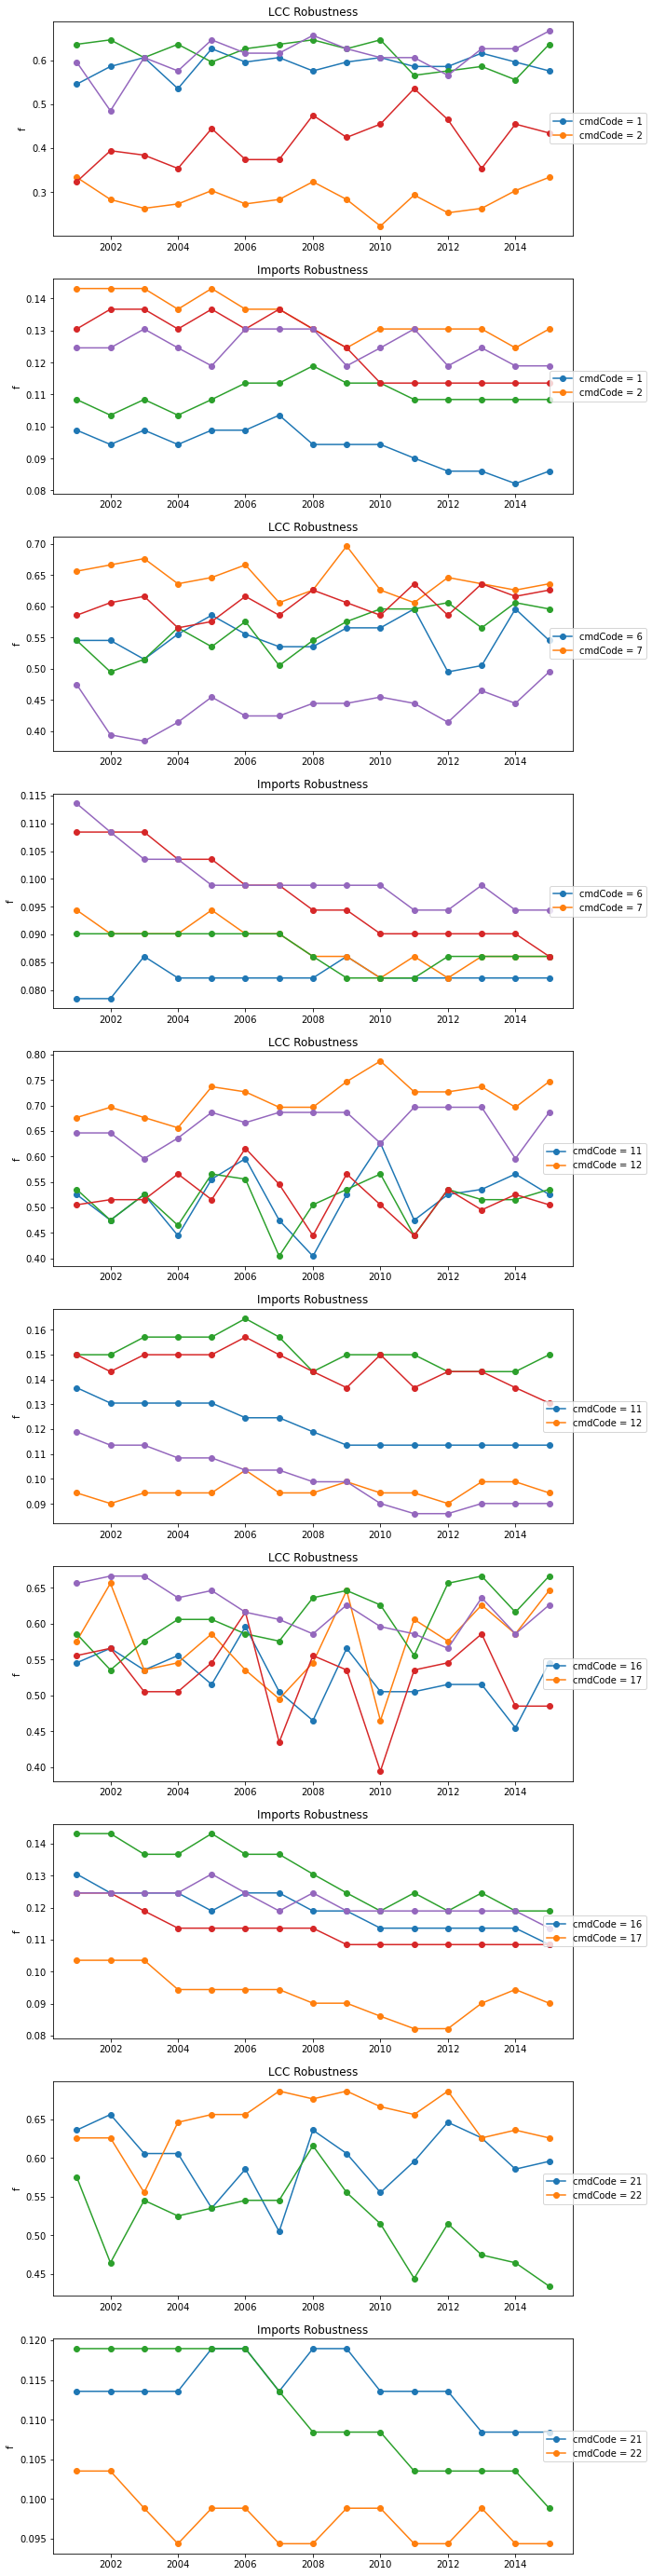

In [106]:
fig, ax = plt.subplots(2*(1+len(commodities)//5),1, figsize=[2*(1+len(commodities)//5),10*(1+len(commodities)//5)])

for cc, comm in enumerate(commodities):
    ax[2*(cc//5)].plot(years, robustness['LCC'][cc], '-o', label='cmdCode = '+str(comm))
    ax[2*(cc//5)+1].plot(years, robustness['Imports'][cc], '-o', label='cmdCode = '+str(comm))
    if (cc%5 == 1):
        ax[2*(cc//5)].legend(loc='center right', bbox_to_anchor=(1.15,0.5))
        ax[2*(cc//5)+1].legend(loc='center right', bbox_to_anchor=(1.15,0.5))
        ax[2*(cc//5)].set_title('LCC Robustness')
        ax[2*(cc//5)+1].set_title('Imports Robustness')
        ax[2*(cc//5)].set_ylabel('f')
        ax[2*(cc//5)+1].set_ylabel('f')
plt.show()

In [99]:
14//3

4

* Net character
* 

In [54]:
#def fast_robustness(G, eps=0.5, strongly=True, label=''):
#    '''
#    It performs the BC attack and return the fraction for which the P drop below eps
#    '''
#    steps = 100
#    frac = np.arange(2.0)
#    n_nodes = len(G.nodes())
#    n_edges = len(G.edges())
#    unsorted_EBC = nx.edge_betweenness_centrality(G)
#    sorted_EBC   = dict(sorted(unsorted_EBC.items(), key=lambda item: item[1], reverse=True))
#    if (strongly):
#        P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
#    else:
#        P_0 = len(max(nx.weakly_connected_components(G), key=len)) #/ n_nodes
#    P_f = []
    #frac_to_drop = np.linspace(0.001,0.999,steps)
#    
#    for _ in tqdm(range(20), desc=str(label), leave=False):
#        f = frac.sum()/2
#                  
#        G_reduced = G.copy()
#        to_remove = list(sorted_EBC.keys())[:int(f*n_edges)]
#        G_reduced.remove_edges_from(to_remove)
#        if (strongly):
#            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
#        else:
#            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
#        p = pf / P_0
#    #ix = list(np.array(P_f) < eps).index(True)
#        if (p > eps):
#                #P_f[1] = p
#            frac[0] = f
#        else:
#            #P_f[0] = p
#            frac[1] = f
#    return frac.sum()/2, np.abs(np.diff(frac)/2)

def fast_robustness(G, eps=0.5, strongly=True, label=''):
    '''
    It performs the BCw attack and return the fraction for which the P drop below eps
    '''
    steps = 50
    n_nodes = len(G.nodes())
    n_edges = len(G.edges())
    if (strongly):
        P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
    else:
        P_0 = len(max(nx.weakly_connected_components(G), key=len)) #/ n_nodes
    P_f = []
    frac_to_drop = np.linspace(0.401,0.799,steps)
    
    G_reduced = G.copy()
    last_f = 0
    for f in tqdm(frac_to_drop, desc=str(label), leave=False):
        unsorted_EBCw = nx.edge_betweenness_centrality(G_reduced, weight='TradeValue')
        sorted_EBCw   = dict(sorted(unsorted_EBCw.items(), key=lambda item: item[1], reverse=True))
        to_remove = list(sorted_EBCw.keys())[:int((f-last_f)*n_edges)]
        #unsorted_EBC = nx.edge_betweenness_centrality(G_reduced)
        #sorted_EBC   = dict(sorted(unsorted_EBC.items(), key=lambda item: item[1], reverse=True))
        #to_remove = list(sorted_EBC.keys())[:int((f-last_f)*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f.append(pf / P_0)
        last_f = f
    ix = list(np.array(P_f) < eps).index(True)
    return frac_to_drop[ix]

def fast_robustness2(df, eps=0.5, label=''):
    '''
    It performs the Strong attack and return the fraction for which the P drop below eps
    '''
    df['norm_tv'] = df.TradeValue / df.groupby('rt3ISO')['TradeValue'].transform('sum')
    n_rt = len(np.unique(df.rt3ISO))
    n_edges = len(df)
    ix = list(df.index)
    ix.sort(key=list(df.norm_tv).__getitem__, reverse=True)
    steps = 200
    frac = np.arange(2.0)
    #P_f = np.arange(1.0, -1.0, -1)
    #frac_to_drop = np.logspace(-4,0,steps)
    for _ in tqdm(range(30), desc=str(label), leave=False):
        f = frac.sum()/2
        
        tmp = df.copy().reset_index()
        tmp.loc[ix[:int(f*n_edges)], 'norm_tv'] = 0
         
        p = tmp.groupby('rt3ISO')['norm_tv'].sum().values.sum()/n_rt
        
        if (p > eps):
            #P_f[1] = p
            frac[0] = f
        else:
            #P_f[0] = p
            frac[1] = f
            
    return frac.sum()/2

In [53]:
#fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
#df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)
years = np.unique(df.yr)
commodities = np.unique(df.cmdCode)
robustness = {'LCC'     : np.zeros((len(commodities), len(years))),
              'Imports' : np.zeros((len(commodities), len(years)))}
for yy,year in enumerate(years):
    for cc,comm in enumerate(commodities):
        tmp_df = df.loc[(df.cmdCode == comm) & (df.yr == year)].reset_index()
        tmp_G  = nx.from_pandas_edgelist(tmp_df,
                                         source       = 'rt3ISO',
                                         target       = 'pt3ISO',
                                         edge_attr    =  'TradeValue',
                                         create_using = nx.DiGraph())
        robustness['LCC'][cc,yy] = fast_robustness(tmp_G, eps=0.01, strongly=True, label='LCC comm='+str(comm)+' year='+str(year))
        robustness['Imports'][cc,yy] =fast_robustness2(tmp_df, eps=0.01, label='Imports comm='+str(comm)+' year='+str(year))


np.save('results/robustness_01_BC.npy', robustness)

ValueError: True is not in list

In [4]:
years = np.unique(df.yr)
commodities = np.unique(df.cmdCode)
robustness = np.load('results/robustness_01.npy', allow_pickle='TRUE').item()

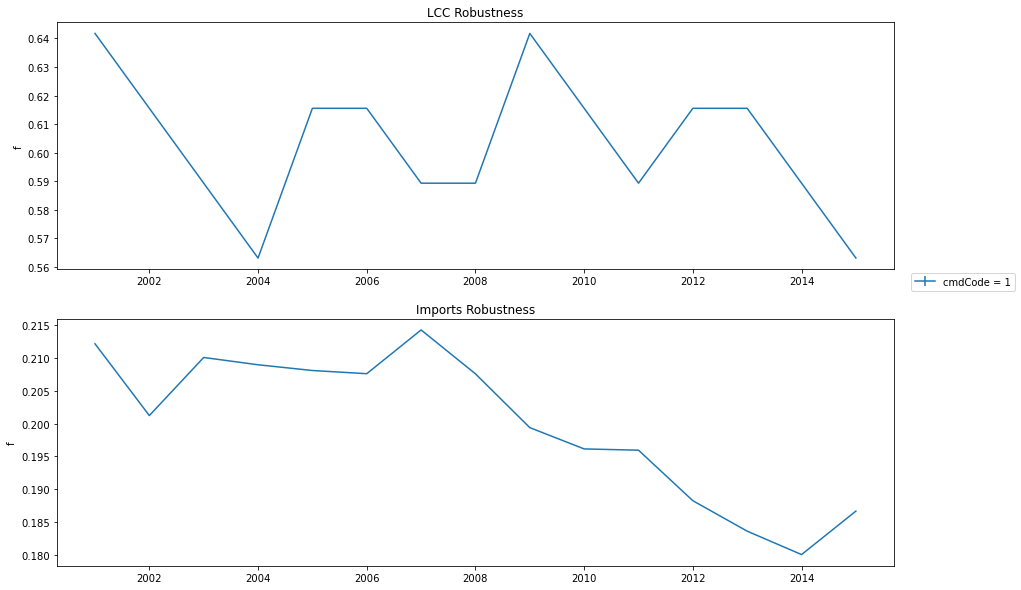

In [44]:
fig, ax = plt.subplots(2,1, figsize=[15,10])

for cc, comm in enumerate(commodities):
    #ax[2*(cc//5)].plot(years, robustness['LCC'][cc], '-o', label='cmdCode = '+str(comm))
    #ax[2*(cc//5)+1].plot(years, robustness['Imports'][cc], '-o', label='cmdCode = '+str(comm))
    ax[0].errorbar(years, robustness['LCC'][cc], yerr=robustness['LCC_err'][cc], label='cmdCode = '+str(comm))
    ax[1].errorbar(years, robustness['Imports'][cc], yerr=robustness['Imports_err'][cc], label='cmdCode = '+str(comm))
#if (cc%5 == 1):
ax[0].legend(loc='center right', bbox_to_anchor=(1.15,-0.05))
#ax[1].legend(loc='center right', bbox_to_anchor=(1.15,0.5))
ax[0].set_title('LCC Robustness')
ax[1].set_title('Imports Robustness')
ax[0].set_ylabel('f')
ax[1].set_ylabel('f')
plt.show()

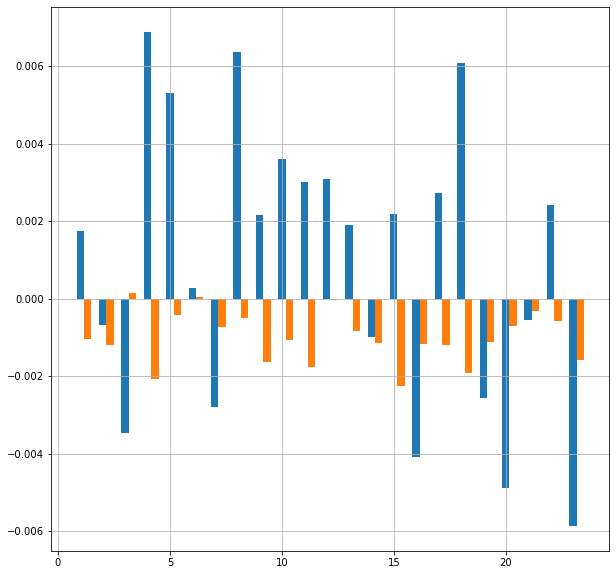

In [144]:
plt.figure(figsize=[10,10])
slopes_LCC = np.zeros(len(commodities))
slopes_Imp = np.zeros(len(commodities))
for cc, comm in enumerate(commodities):
    slopes_LCC[cc], _ = np.polyfit(years, robustness['LCC'][cc], 1)
    slopes_Imp[cc], _ = np.polyfit(years, robustness['Imports'][cc], 1)
plt.bar(commodities, slopes_LCC, width=0.33)
plt.bar(commodities+0.33, slopes_Imp, width=0.33)
plt.grid()

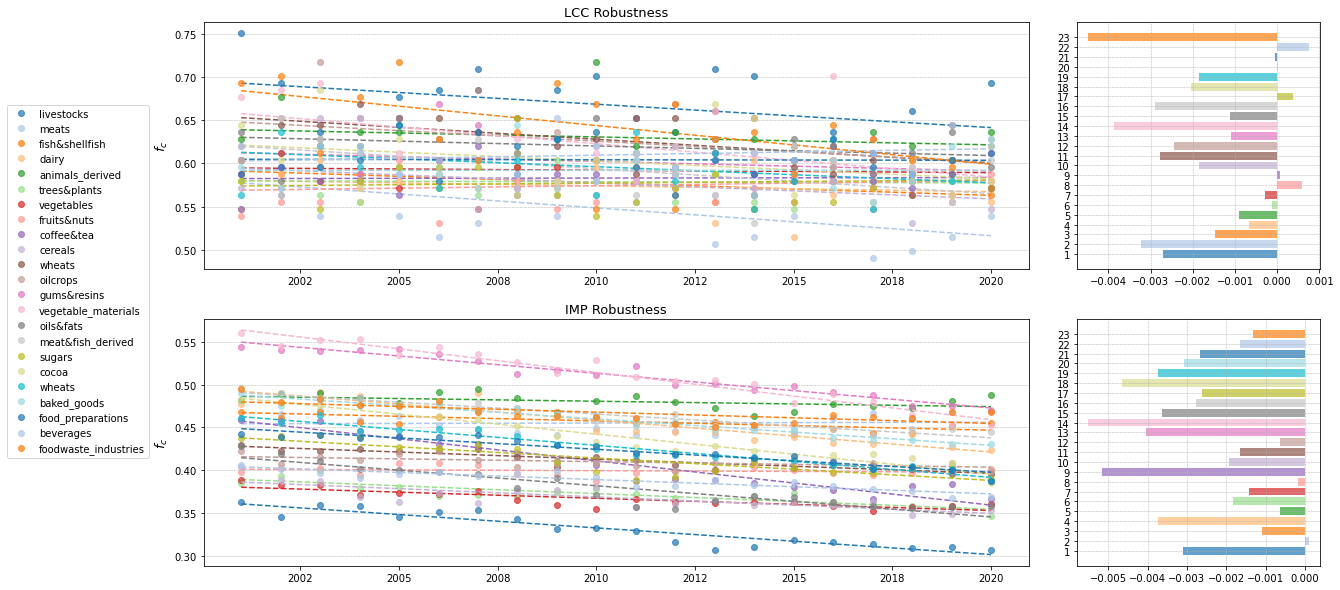

In [5]:
gridsize = (2,4)
fig = plt.figure(figsize=[20,10])
ax00 = plt.subplot2grid(gridsize, (0, 0), colspan=3, rowspan=1)
ax10 = plt.subplot2grid(gridsize, (1, 0), colspan=3, rowspan=1)
ax01 = plt.subplot2grid(gridsize, (0, 3), colspan=1, rowspan=1)
ax11 = plt.subplot2grid(gridsize, (1, 3), colspan=1, rowspan=1)

slopes_LCC = np.zeros(len(commodities))
slopes_Imp = np.zeros(len(commodities))

cmap = get_cmap('tab20')  # type: matplotlib.colors.ListedColormap
colorss = cmap.colors  # type: list

for cc, comm in enumerate(commodities):
    slopes_LCC[cc], y0_LCC = np.polyfit(years, robustness['LCC'][cc], 1)
    slopes_Imp[cc], y0_Imp = np.polyfit(years, robustness['Imports'][cc], 1)
    #ax00.plot(years, robustness['LCC'][cc], '-o', label='cmdCode = '+str(comm), color=colorss[cc%20])
    #ax10.plot(years, robustness['Imports'][cc], '-o', label='cmdCode = '+str(comm))
    ax00.plot(years, robustness['LCC'][cc], 'o', label=commodities_labels.redDesc[cc], color=colorss[cc%20], alpha=.7, zorder=30+cc)
    ax10.plot(years, robustness['Imports'][cc], 'o', label='cmdCode = '+str(comm), color=colorss[cc%20], alpha=.7)
    ax00.plot(years, years*slopes_LCC[cc] + y0_LCC, '--', color=colorss[cc%20])
    ax10.plot(years, years*slopes_Imp[cc] + y0_Imp, '--', color=colorss[cc%20])

ax01.set_yticks(commodities)
ax01.grid(linestyle='--', zorder=-10, linewidth=0.5)
ax11.set_yticks(commodities)
ax11.grid(linestyle='--', zorder=-10, linewidth=0.5)

ax01.barh(commodities, slopes_LCC, color=colorss, alpha=.7)
ax11.barh(commodities, slopes_Imp, color=colorss, alpha=.7)

ax00.legend(loc='center right', bbox_to_anchor=(-0.06,-0.05))
ax00.set_title('LCC Robustness', fontsize=13)
ax00.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax10.set_title('IMP Robustness', fontsize=13)
ax10.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax00.set_ylabel('$f_c$', fontsize=13)
ax10.set_ylabel('$f_c$', fontsize=13)

ax00.grid(axis='y', linestyle='--', linewidth=0.5)
ax10.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

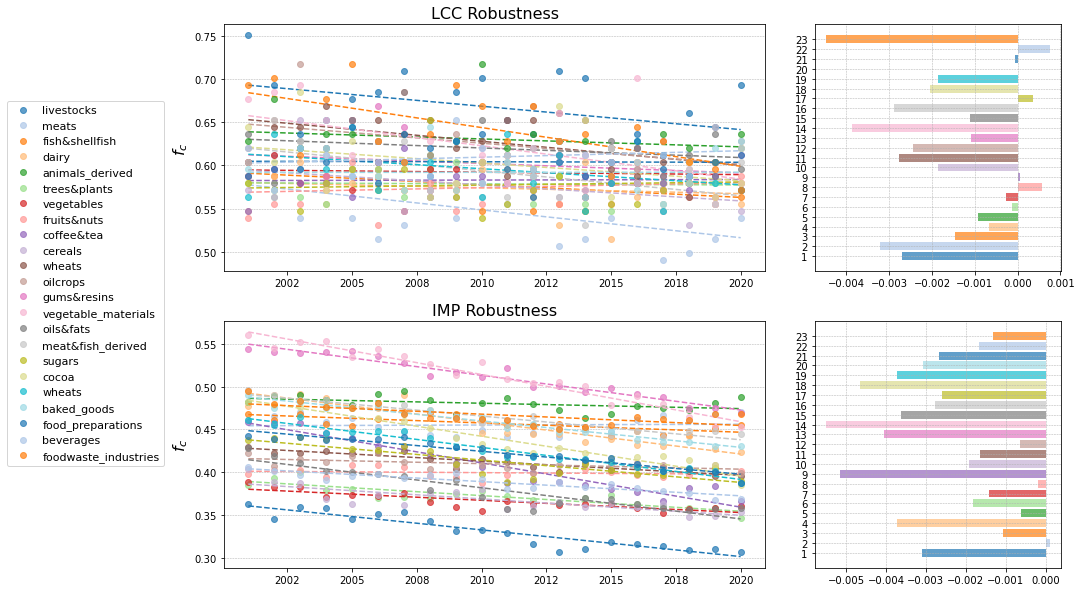

In [17]:
#
#  Version 2
#
gridsize = (2,3)
fig = plt.figure(figsize=[15,10])
ax00 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=1)
ax10 = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=1)
ax01 = plt.subplot2grid(gridsize, (0, 2), colspan=1, rowspan=1)
ax11 = plt.subplot2grid(gridsize, (1, 2), colspan=1, rowspan=1)

slopes_LCC = np.zeros(len(commodities))
slopes_Imp = np.zeros(len(commodities))

cmap = get_cmap('tab20')  # type: matplotlib.colors.ListedColormap
colorss = cmap.colors  # type: list

for cc, comm in enumerate(commodities):
    slopes_LCC[cc], y0_LCC = np.polyfit(years, robustness['LCC'][cc], 1)
    slopes_Imp[cc], y0_Imp = np.polyfit(years, robustness['Imports'][cc], 1)
    #ax00.plot(years, robustness['LCC'][cc], '-o', label='cmdCode = '+str(comm), color=colorss[cc%20])
    #ax10.plot(years, robustness['Imports'][cc], '-o', label='cmdCode = '+str(comm))
    ax00.plot(years, robustness['LCC'][cc], 'o', label=commodities_labels.redDesc[cc], color=colorss[cc%20], alpha=.7, zorder=30+cc)
    ax10.plot(years, robustness['Imports'][cc], 'o', label='cmdCode = '+str(comm), color=colorss[cc%20], alpha=.7)
    ax00.plot(years, years*slopes_LCC[cc] + y0_LCC, '--', color=colorss[cc%20])
    ax10.plot(years, years*slopes_Imp[cc] + y0_Imp, '--', color=colorss[cc%20])

ax01.set_yticks(commodities)
ax01.grid(linestyle='--', zorder=-10, linewidth=0.5)
ax11.set_yticks(commodities)
ax11.grid(linestyle='--', zorder=-10, linewidth=0.5)

ax01.barh(commodities, slopes_LCC, color=colorss, alpha=.7)
ax11.barh(commodities, slopes_Imp, color=colorss, alpha=.7)

ax00.legend(loc='center right', bbox_to_anchor=(-0.1,-0.05), fontsize=11)
ax00.set_title('LCC Robustness', fontsize=16)
ax00.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax10.set_title('IMP Robustness', fontsize=16)
ax10.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax00.set_ylabel('$f_c$', fontsize=16)
ax10.set_ylabel('$f_c$', fontsize=16)

ax00.grid(axis='y', linestyle='--', linewidth=0.5)
ax10.grid(axis='y', linestyle='--', linewidth=0.5)
#plt.tight_layout()
plt.show()

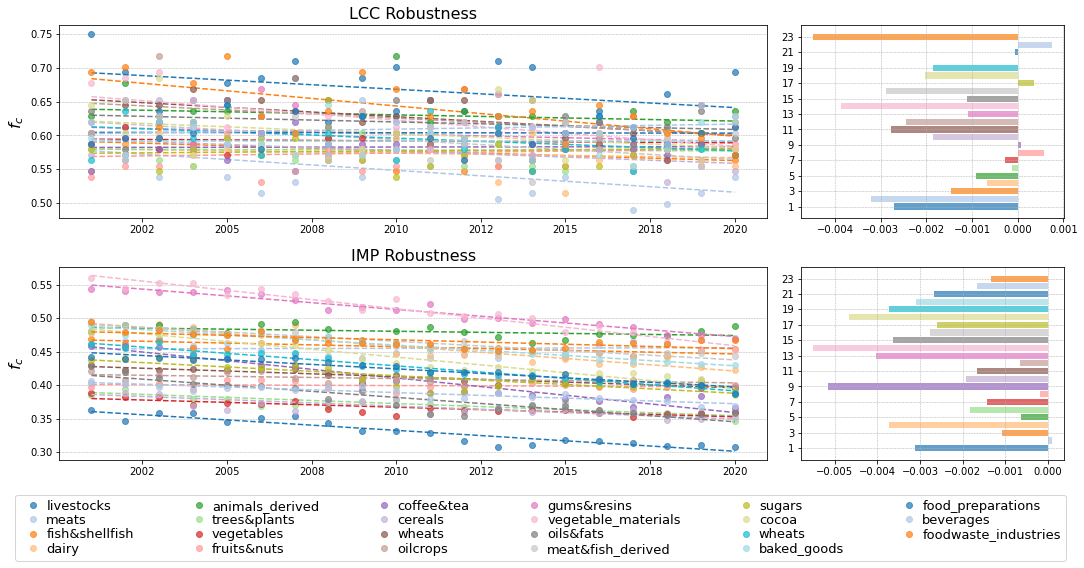

In [73]:
#
#  Version 3
#
gridsize = (2,7)
fig = plt.figure(figsize=[18,8])
ax00 = plt.subplot2grid(gridsize, (0, 0), colspan=5, rowspan=1)
ax10 = plt.subplot2grid(gridsize, (1, 0), colspan=5, rowspan=1)
ax01 = plt.subplot2grid(gridsize, (0, 5), colspan=2, rowspan=1)
ax11 = plt.subplot2grid(gridsize, (1, 5), colspan=2, rowspan=1)

slopes_LCC = np.zeros(len(commodities))
slopes_Imp = np.zeros(len(commodities))

cmap = get_cmap('tab20')  # type: matplotlib.colors.ListedColormap
colorss = cmap.colors  # type: list

for cc, comm in enumerate(commodities):
    slopes_LCC[cc], y0_LCC = np.polyfit(years, robustness['LCC'][cc], 1)
    slopes_Imp[cc], y0_Imp = np.polyfit(years, robustness['Imports'][cc], 1)
    #ax00.plot(years, robustness['LCC'][cc], '-o', label='cmdCode = '+str(comm), color=colorss[cc%20])
    #ax10.plot(years, robustness['Imports'][cc], '-o', label='cmdCode = '+str(comm))
    ax00.plot(years, robustness['LCC'][cc], 'o', label=commodities_labels.redDesc[cc], color=colorss[cc%20], alpha=.7, zorder=30+cc)
    ax10.plot(years, robustness['Imports'][cc], 'o', label=commodities_labels.redDesc[cc], color=colorss[cc%20], alpha=.7)
    ax00.plot(years, years*slopes_LCC[cc] + y0_LCC, '--', color=colorss[cc%20])
    ax10.plot(years, years*slopes_Imp[cc] + y0_Imp, '--', color=colorss[cc%20])

ax01.set_yticks(commodities)
ax01.grid(linestyle='--', zorder=-10, linewidth=0.5)
ax11.set_yticks(commodities)
ax11.grid(linestyle='--', zorder=-10, linewidth=0.5)

ax01.barh(commodities, slopes_LCC, color=colorss, alpha=.7)
ax11.barh(commodities, slopes_Imp, color=colorss, alpha=.7)
ax01.set_yticks(range(1, 24, 2))
ax11.set_yticks(range(1, 24, 2))

ax10.legend(loc='center', bbox_to_anchor=(0.68,-0.35), fontsize=13, ncol=6, labelspacing=0.1, handletextpad=0.01, columnspacing=4)
ax00.set_title('LCC Robustness', fontsize=16)
ax00.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax10.set_title('IMP Robustness', fontsize=16)
ax10.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax00.set_ylabel('$f_c$', fontsize=16)
ax10.set_ylabel('$f_c$', fontsize=16)

ax00.grid(axis='y', linestyle='--', linewidth=0.5)
ax10.grid(axis='y', linestyle='--', linewidth=0.5)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=.30)
plt.show()

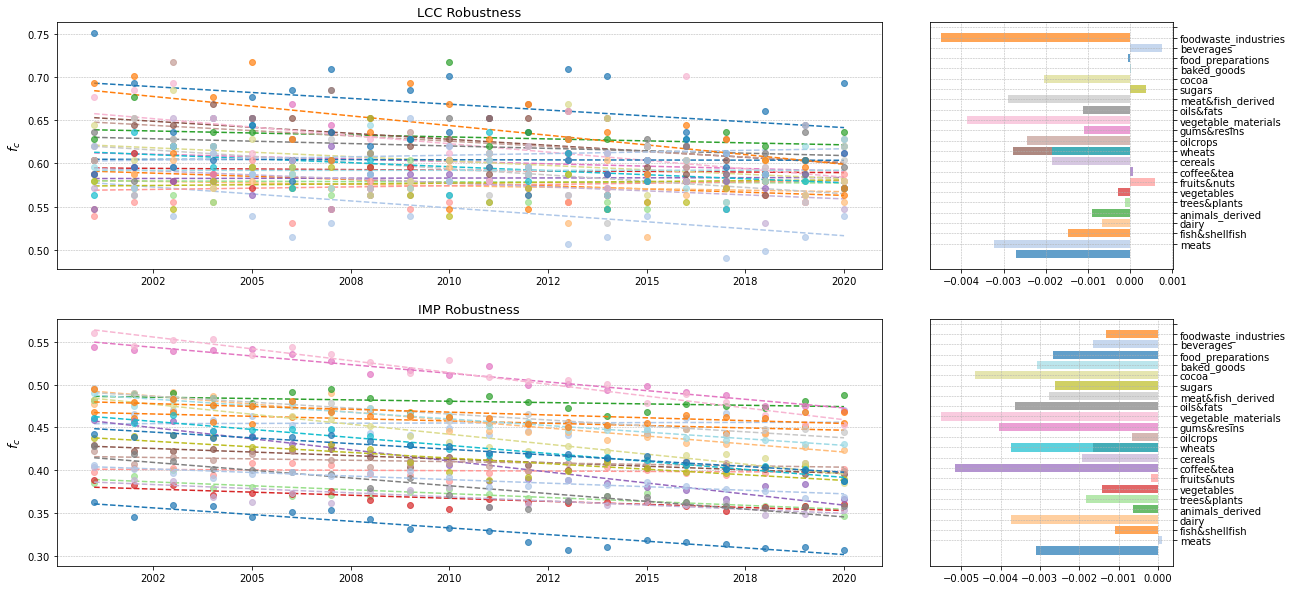

In [202]:
gridsize = (2,4)
fig = plt.figure(figsize=[20,10])
ax00 = plt.subplot2grid(gridsize, (0, 0), colspan=3, rowspan=1)
ax10 = plt.subplot2grid(gridsize, (1, 0), colspan=3, rowspan=1)
ax01 = plt.subplot2grid(gridsize, (0, 3), colspan=1, rowspan=1)
ax11 = plt.subplot2grid(gridsize, (1, 3), colspan=1, rowspan=1)

slopes_LCC = np.zeros(len(commodities))
slopes_Imp = np.zeros(len(commodities))

cmap = get_cmap('tab20')  # type: matplotlib.colors.ListedColormap
colorss = cmap.colors  # type: list

for cc, comm in enumerate(commodities):
    slopes_LCC[cc], y0_LCC = np.polyfit(years, robustness['LCC'][cc], 1)
    slopes_Imp[cc], y0_Imp = np.polyfit(years, robustness['Imports'][cc], 1)
    #ax00.plot(years, robustness['LCC'][cc], '-o', label='cmdCode = '+str(comm), color=colorss[cc%20])
    #ax10.plot(years, robustness['Imports'][cc], '-o', label='cmdCode = '+str(comm))
    ax00.plot(years, robustness['LCC'][cc], 'o', label=commodities_labels.redDesc[cc], color=colorss[cc%20], alpha=.7, zorder=30+cc)
    ax10.plot(years, robustness['Imports'][cc], 'o', label='cmdCode = '+str(comm), color=colorss[cc%20], alpha=.7)
    ax00.plot(years, years*slopes_LCC[cc] + y0_LCC, '--', color=colorss[cc%20])
    ax10.plot(years, years*slopes_Imp[cc] + y0_Imp, '--', color=colorss[cc%20])

ax01.set_yticks(commodities)
ax01.grid(linestyle='--', zorder=-10, linewidth=0.5)
ax11.set_yticks(commodities)
ax11.grid(linestyle='--', zorder=-10, linewidth=0.5)

ax01.barh(commodities_labels.redDesc.values, slopes_LCC, color=colorss, alpha=.7)
ax01.yaxis.set_label_position('right')
ax01.yaxis.tick_right()
ax11.barh(commodities_labels.redDesc.values, slopes_Imp, color=colorss, alpha=.7)
ax11.yaxis.set_label_position('right')
ax11.yaxis.tick_right()

#ax00.legend(loc='center right', bbox_to_anchor=(-0.06,-0.05))
ax00.set_title('LCC Robustness', fontsize=13)
ax10.set_title('IMP Robustness', fontsize=13)
ax00.set_ylabel('$f_c$', fontsize=13)
ax10.set_ylabel('$f_c$', fontsize=13)
ax00.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax10.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax00.grid(axis='y', linestyle='--', linewidth=0.5)
ax10.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

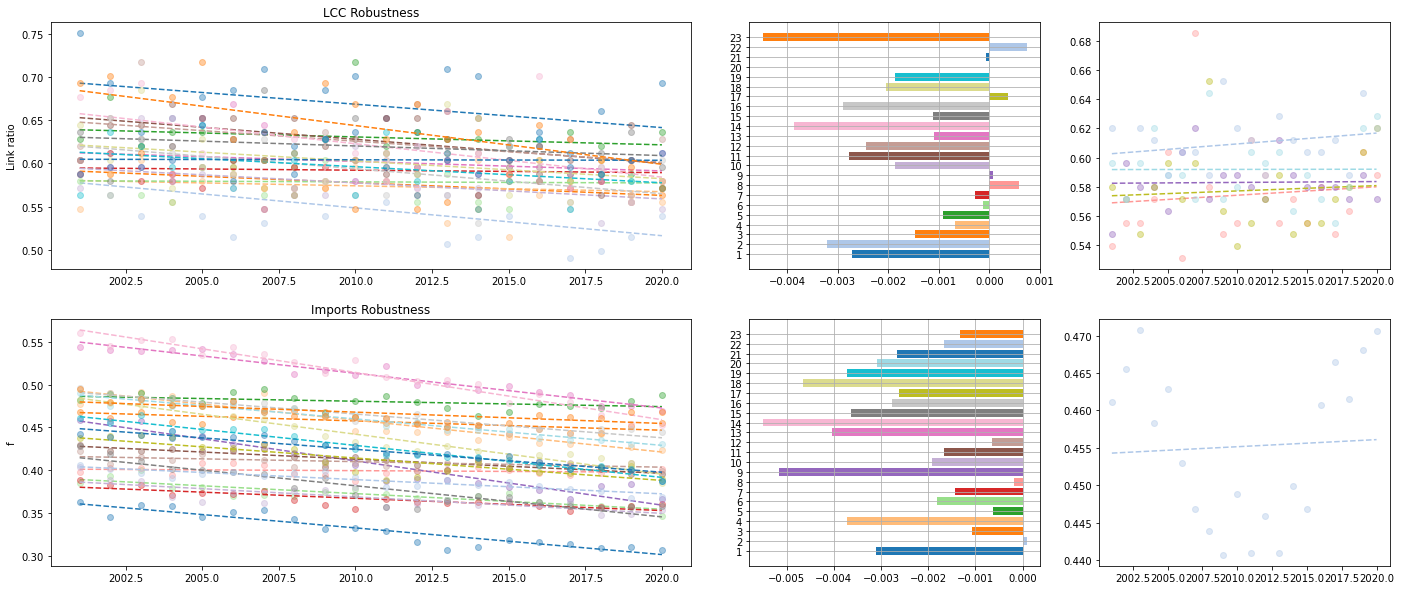

In [182]:
#### gridsize = (2,5)
fig = plt.figure(figsize=[24,10])
ax00 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=1)
ax10 = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=1)
ax01 = plt.subplot2grid(gridsize, (0, 2), colspan=1, rowspan=1)
ax11 = plt.subplot2grid(gridsize, (1, 2), colspan=1, rowspan=1)
ax02 = plt.subplot2grid(gridsize, (0, 3), colspan=2, rowspan=1)
ax12 = plt.subplot2grid(gridsize, (1, 3), colspan=2, rowspan=1)

slopes_LCC = np.zeros(len(commodities))
slopes_Imp = np.zeros(len(commodities))

cmap = get_cmap('tab20')  # type: matplotlib.colors.ListedColormap
colorss = cmap.colors  # type: list

for cc, comm in enumerate(commodities):
    slopes_LCC[cc], y0_LCC = np.polyfit(years, robustness['LCC'][cc], 1)
    slopes_Imp[cc], y0_Imp = np.polyfit(years, robustness['Imports'][cc], 1)
    #ax00.plot(years, robustness['LCC'][cc], '-o', label='cmdCode = '+str(comm), color=colorss[cc%20])
    #ax10.plot(years, robustness['Imports'][cc], '-o', label='cmdCode = '+str(comm))
    if (slopes_LCC[cc] <0):
        ax00.plot(years, robustness['LCC'][cc], 'o', label='cmdCode = '+str(comm), color=colorss[cc%20], alpha=.4)
        ax00.plot(years, years*slopes_LCC[cc] + y0_LCC, '--', color=colorss[cc%20])
    else:
        ax02.plot(years, robustness['LCC'][cc], 'o', label='cmdCode = '+str(comm), color=colorss[cc%20], alpha=.4)
        ax02.plot(years, years*slopes_LCC[cc] + y0_LCC, '--', color=colorss[cc%20])
    if (slopes_Imp[cc] <0):
        ax10.plot(years, robustness['Imports'][cc], 'o', label='cmdCode = '+str(comm), color=colorss[cc%20], alpha=.4)
        ax10.plot(years, years*slopes_Imp[cc] + y0_Imp, '--', color=colorss[cc%20])
    else:
        ax12.plot(years, robustness['Imports'][cc], 'o', label='cmdCode = '+str(comm), color=colorss[cc%20], alpha=.4)
        ax12.plot(years, years*slopes_Imp[cc] + y0_Imp, '--', color=colorss[cc%20])

ax01.set_yticks(commodities)
ax01.grid()
ax11.set_yticks(commodities)
ax11.grid()

ax01.barh(commodities, slopes_LCC, color=colorss)
ax11.barh(commodities, slopes_Imp, color=colorss)

#ax00.legend(loc='center right', bbox_to_anchor=(-0.06,-0.05))
ax00.set_title('LCC Robustness')
ax10.set_title('Imports Robustness')
ax00.set_ylabel('Link ratio')
ax10.set_ylabel('f')
plt.show()

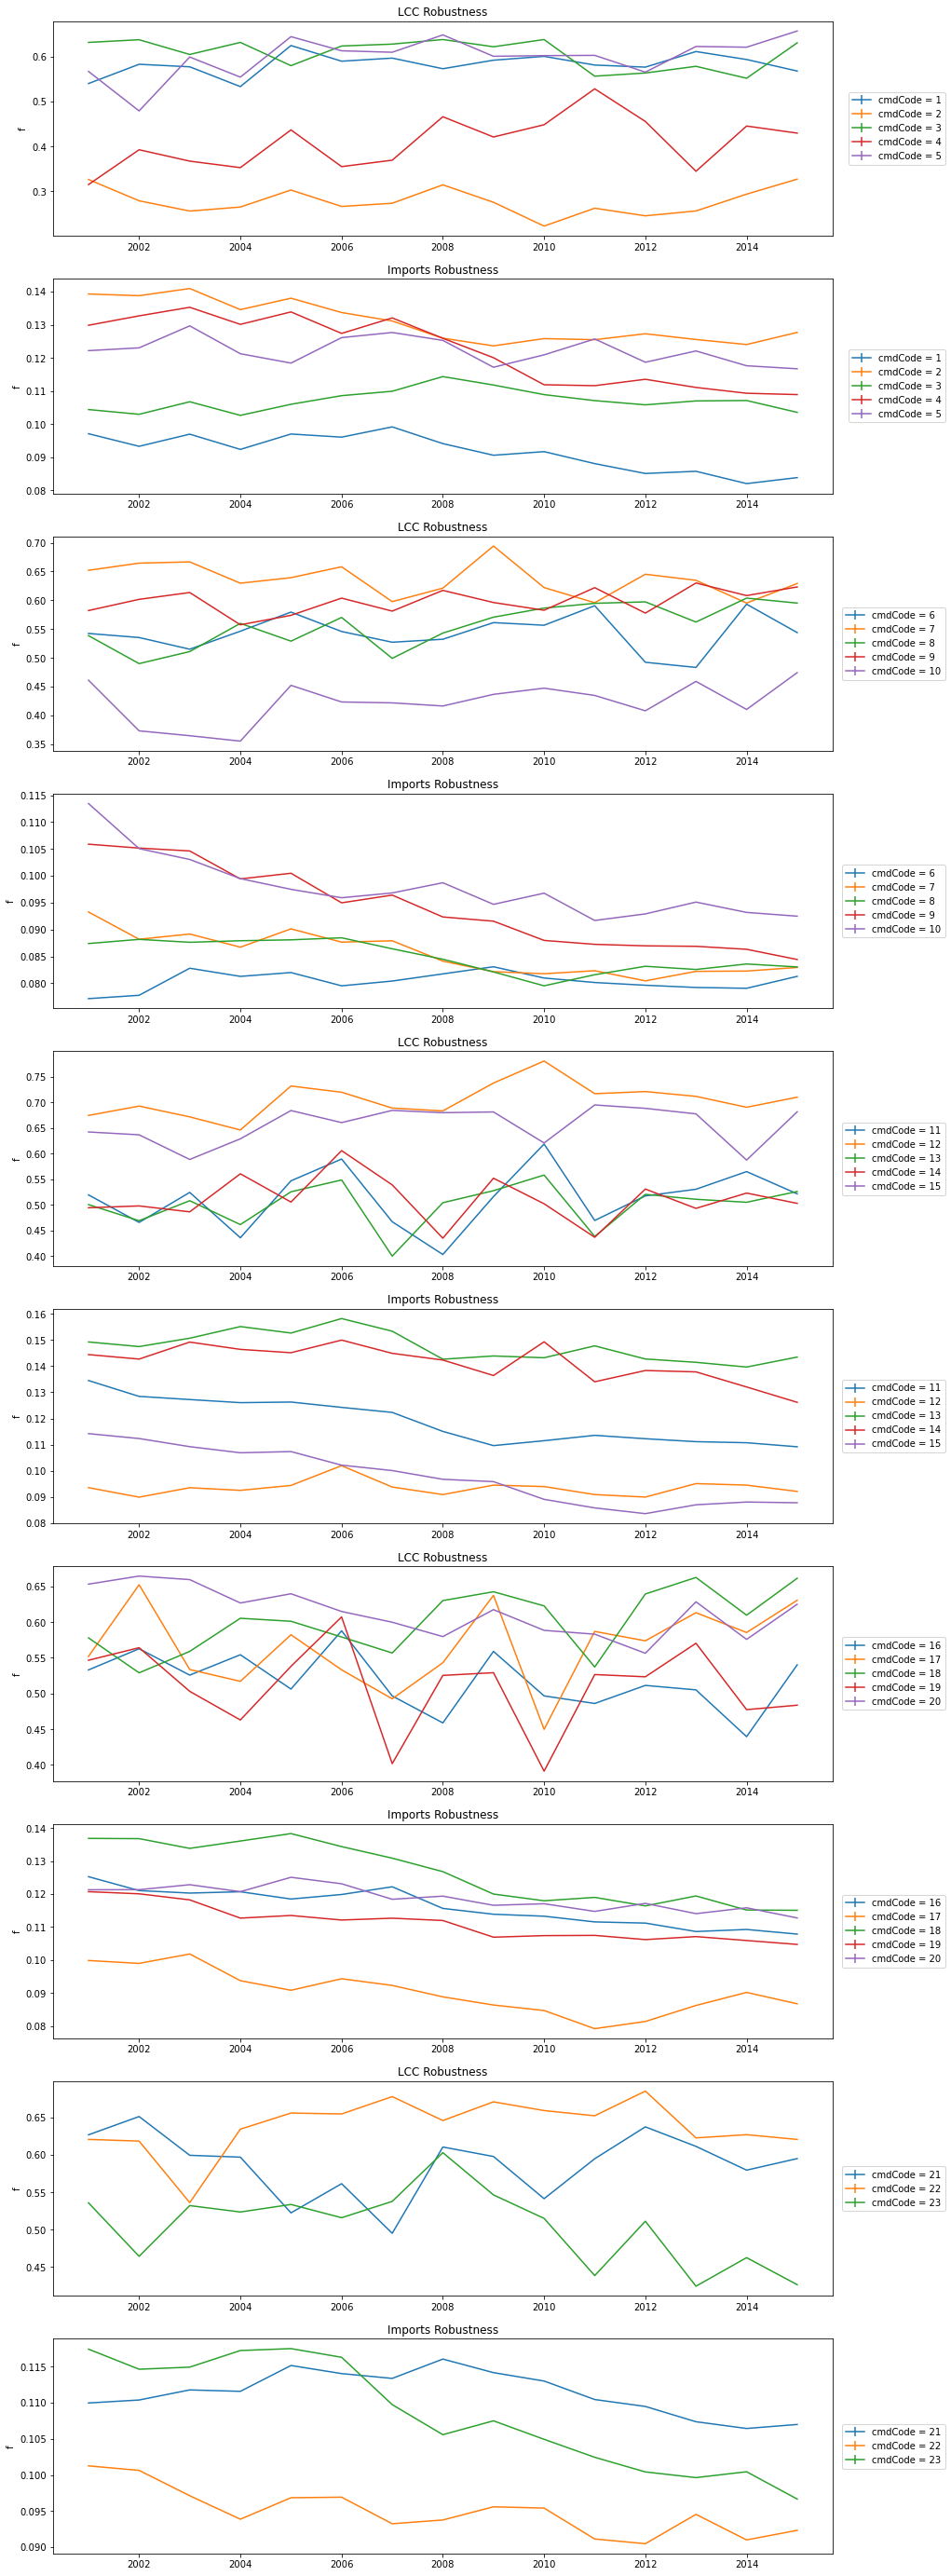

In [128]:
fig, ax = plt.subplots(2*(1+len(commodities)//5),1, figsize=[15,10*(1+len(commodities)//5)])

for cc, comm in enumerate(commodities):
    #ax[2*(cc//5)].plot(years, robustness['LCC'][cc], '-o', label='cmdCode = '+str(comm))
    #ax[2*(cc//5)+1].plot(years, robustness['Imports'][cc], '-o', label='cmdCode = '+str(comm))
    ax[2*(cc//5)].errorbar(years, robustness['LCC'][cc], yerr=robustness['LCC_err'][cc], label='cmdCode = '+str(comm))
    ax[2*(cc//5)+1].errorbar(years, robustness['Imports'][cc], yerr=robustness['Imports_err'][cc], label='cmdCode = '+str(comm))
#if (cc%5 == 1):
    ax[2*(cc//5)].legend(loc='center right', bbox_to_anchor=(1.15,0.5))
    ax[2*(cc//5)+1].legend(loc='center right', bbox_to_anchor=(1.15,0.5))
    ax[2*(cc//5)].set_title('LCC Robustness')
    ax[2*(cc//5)+1].set_title('Imports Robustness')
    ax[2*(cc//5)].set_ylabel('f')
    ax[2*(cc//5)+1].set_ylabel('f')
plt.show()

In [118]:
robustness['LCC_err'][cc]

array([4.76837158e-07, 4.76837158e-07])

In [14]:
np.dot(np.ones((3,1)), np.ones((1,3)))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [30]:
#G.in_degree
#np.outer(G.out_degree,G.out_degree)
out_deg = [val for (node, val) in G.out_degree]
in_deg  = [val for (node, val) in G.in_degree]

In [35]:
np.outer(out_deg, in_deg).mean() - np.array(in_deg).mean()

388.49016898713995

In [203]:
commodities_labels.redDesc.values

array(['livestocks', 'meats', 'fish&shellfish', 'dairy',
       'animals_derived', 'trees&plants', 'vegetables', 'fruits&nuts',
       'coffee&tea', 'cereals', 'wheats', 'oilcrops', 'gums&resins',
       'vegetable_materials', 'oils&fats', 'meat&fish_derived', 'sugars',
       'cocoa', 'wheats', 'baked_goods', 'food_preparations', 'beverages',
       'foodwaste_industries'], dtype=object)